# Analyzer of Stocks


## Libraries


In [1]:
# Import necessary libraries
from dotenv import load_dotenv
from libs import indicators
import alpaca_trade_api as trade_api
import os
import pandas as pd


## Alpaca Connection


In [2]:
load_dotenv()


True

In [3]:
# Get keys and URL for Alpaca API
alpaca_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')
alpaca_paper_trade_url = os.getenv('APCA_API_PAPER_URL')


In [4]:
# Instantiate Alpaca connection
alpaca = trade_api.REST(alpaca_key, alpaca_secret_key, base_url=alpaca_paper_trade_url)


In [5]:
# Default parameters
ticker = 'TWOU'

today = pd.Timestamp('today')
today_date = f'{today:%Y-%m-%d}'

start_date = pd.Timestamp('2020-01-01', tz='America/New_York').isoformat()

end_date = pd.Timestamp(today_date, tz='America/New_York').isoformat()

timeframe = '1D'


In [6]:
# Get dataframe of ticker data
df_ohlcv_original = alpaca.get_barset(ticker, timeframe, start=start_date, end=end_date).df

# Copy of original dataframe
df_ohlcv = df_ohlcv_original[ticker].copy()


## Bollinger Bands


In [7]:
# Bollinger Band configuration
bollinger_band_window = 20
num_standard_deviation = 2

# Generate Bollinger Band data
df_updated = indicators.bollinger_band_generator(df_ohlcv, 'close', bollinger_band_window, num_standard_deviation)


<AxesSubplot:title={'center':'TWOU Bollinger Bands'}, xlabel='Date', ylabel='Price (USD)'>

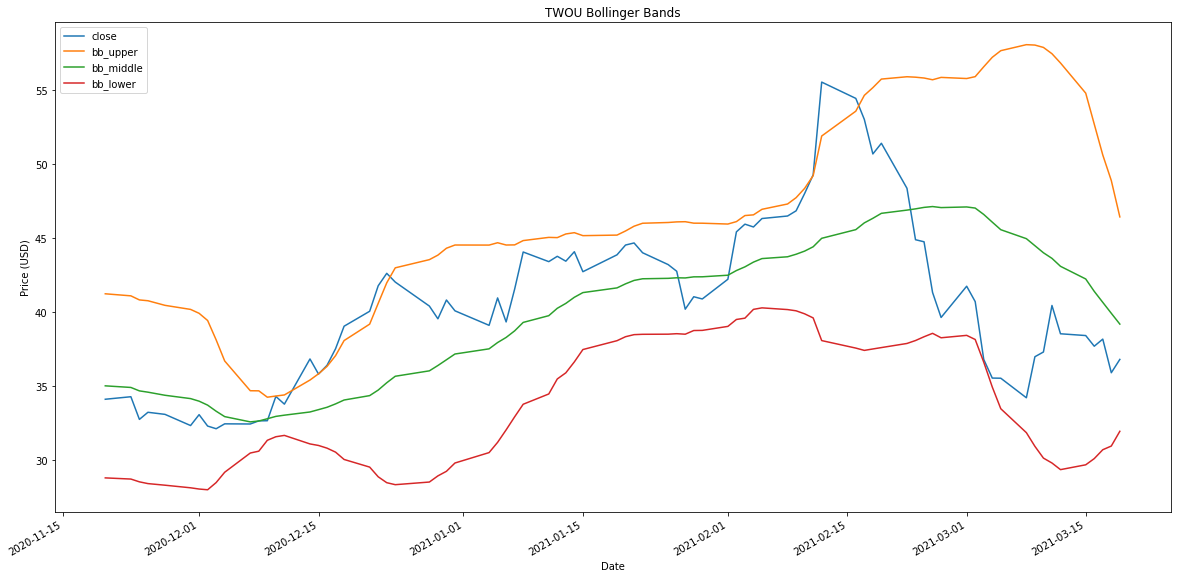

In [8]:
df_updated[['close', 'bb_upper', 'bb_middle', 'bb_lower']].plot(figsize=(20,10), title=f'{ticker} Bollinger Bands', xlabel='Date', ylabel='Price (USD)')


## Keltner Channels


In [9]:
df_updated = indicators.average_true_range_generator(df_updated)


In [13]:
df_updated[-40:]

,open,high,low,close,volume,bb_middle,bb_upper,bb_lower,atr_20
time,,,,,,,,,
2021-01-22 00:00:00-05:00,44.530,45.7800,43.7200,44.00,602930,42.2430,45.991499,38.494501,NaN
2021-01-25 00:00:00-05:00,44.880,45.7100,42.3300,43.20,899055,42.2725,46.042386,38.502614,NaN
2021-01-26 00:00:00-05:00,43.320,44.5899,42.6400,42.75,656352,42.3090,46.082726,38.535274,NaN
2021-01-27 00:00:00-05:00,41.115,41.9700,40.1700,40.19,1808479,42.2985,46.095686,38.501314,NaN
2021-01-28 00:00:00-05:00,40.990,42.3100,40.1300,41.03,1318571,42.3730,45.996817,38.749183,NaN
2021-01-29 00:00:00-05:00,41.000,41.8000,39.7200,40.88,1070887,42.3765,45.994090,38.758910,NaN
2021-02-01 00:00:00-05:00,41.780,42.8300,41.5401,42.21,732406,42.4830,45.937669,39.028331,NaN
2021-02-02 00:00:00-05:00,43.320,46.0800,43.0000,45.41,1222013,42.7985,46.101508,39.495492,NaN
2021-02-03 00:00:00-05:00,46.010,46.8000,45.0600,45.93,1155076,43.0475,46.510726,39.584274,NaN
